# Similarity Analysis

In [4]:
from IPython.display import display, Markdown
import numpy as np

from ydnpd import ALL_EXPERIMENTS, load_dataset, calc_dataset_similarity, plot_distribution_distances
from additional import ADDITIONAL_EXPERIMENTS

[2, 3, 3, 3, 10, 3, 3, 3, 11, 3, 2, 2]

## acs

Dim = 7
Total Dim = 116640


acs/national                   100.0
acs/massachusetts_upsampled     48.5
acs/baseline_univariate         44.6
acs/gen-claude-MIX-UNIF         41.5
acs/gen-claude-MIX-MAX          40.1
acs/gen-MIX-UNIF                30.5
acs/gen-gpt-MIX-MAX             27.4
acs/gen-gpt-MIX-UNIF            27.3
acs/csv-gpt                     25.7
acs/gen-MIX-MAX                 24.6
acs/csv-llama                   16.6
acs/csv-claude                  14.4
acs/gen-llama-MIX-UNIF          13.8
acs/gen-llama-MIX-MAX           10.3
acs/baseline_domain              4.3
acs/arbitrary                    2.8
Name: acs/national, dtype: float64

## edad

Dim = 11
Total Dim = 2188800


edad/2023                   100.0
edad/baseline_univariate      7.1
edad/2020                     4.9
edad/baseline_domain          0.1
edad/arbitrary                0.1
edad/gen-MIX-MAX              0.0
edad/csv-gpt                  0.0
edad/gen-gpt-MIX-MAX          0.0
edad/gen-llama-MIX-MAX        0.0
edad/gen-gpt-MIX-UNIF         0.0
edad/gen-claude-MIX-MAX       0.0
edad/csv-claude               0.0
edad/gen-claude-MIX-UNIF      0.0
edad/gen-MIX-UNIF             0.0
edad/gen-llama-MIX-UNIF       0.0
edad/csv-llama                0.0
Name: edad/2023, dtype: float64

## we

Dim = 12
Total Dim = 1924560


we/2023                   100.0
we/baseline_univariate     15.4
we/2018                     6.7
we/baseline_domain          0.2
we/arbitrary                0.0
we/gen-MIX-MAX              0.0
we/csv-gpt                  0.0
we/gen-gpt-MIX-MAX          0.0
we/gen-llama-MIX-MAX        0.0
we/gen-gpt-MIX-UNIF         0.0
we/gen-claude-MIX-MAX       0.0
we/csv-claude               0.0
we/gen-claude-MIX-UNIF      0.0
we/gen-MIX-UNIF             0.0
we/gen-llama-MIX-UNIF       0.0
we/csv-llama                0.0
Name: we/2023, dtype: float64

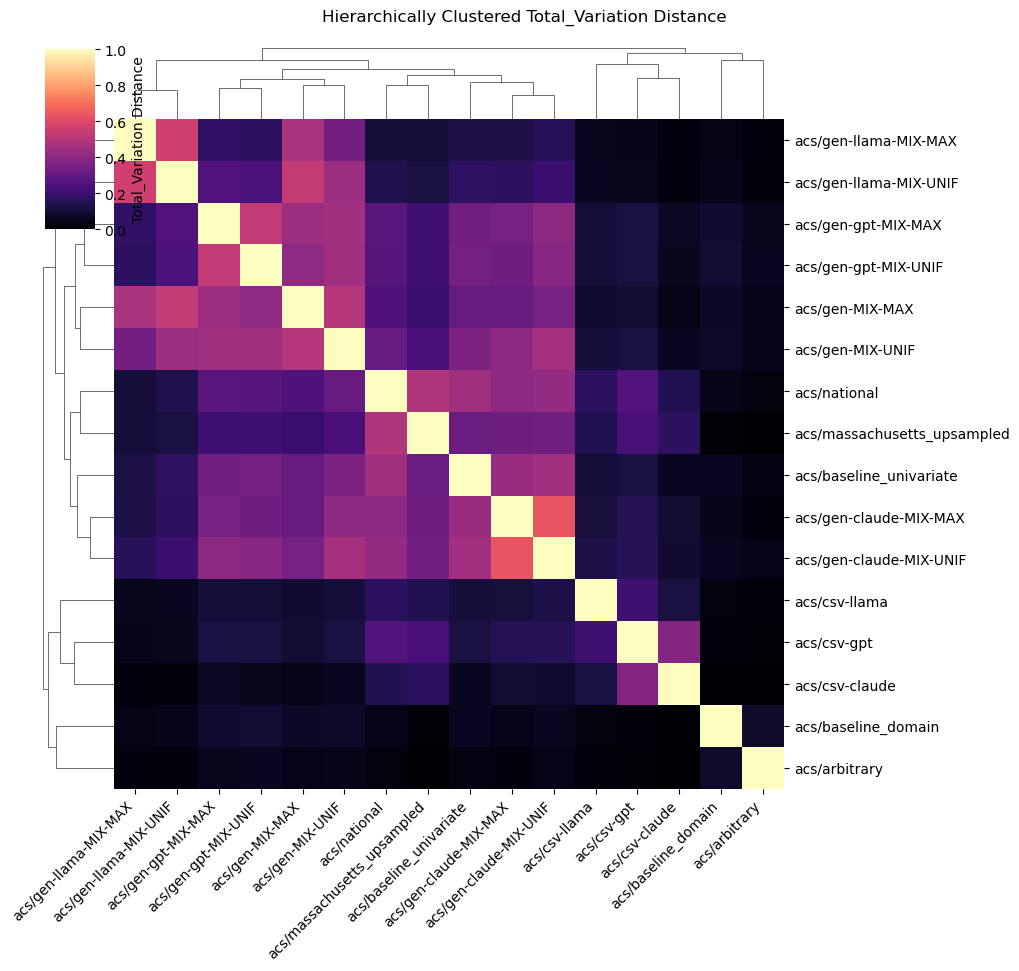

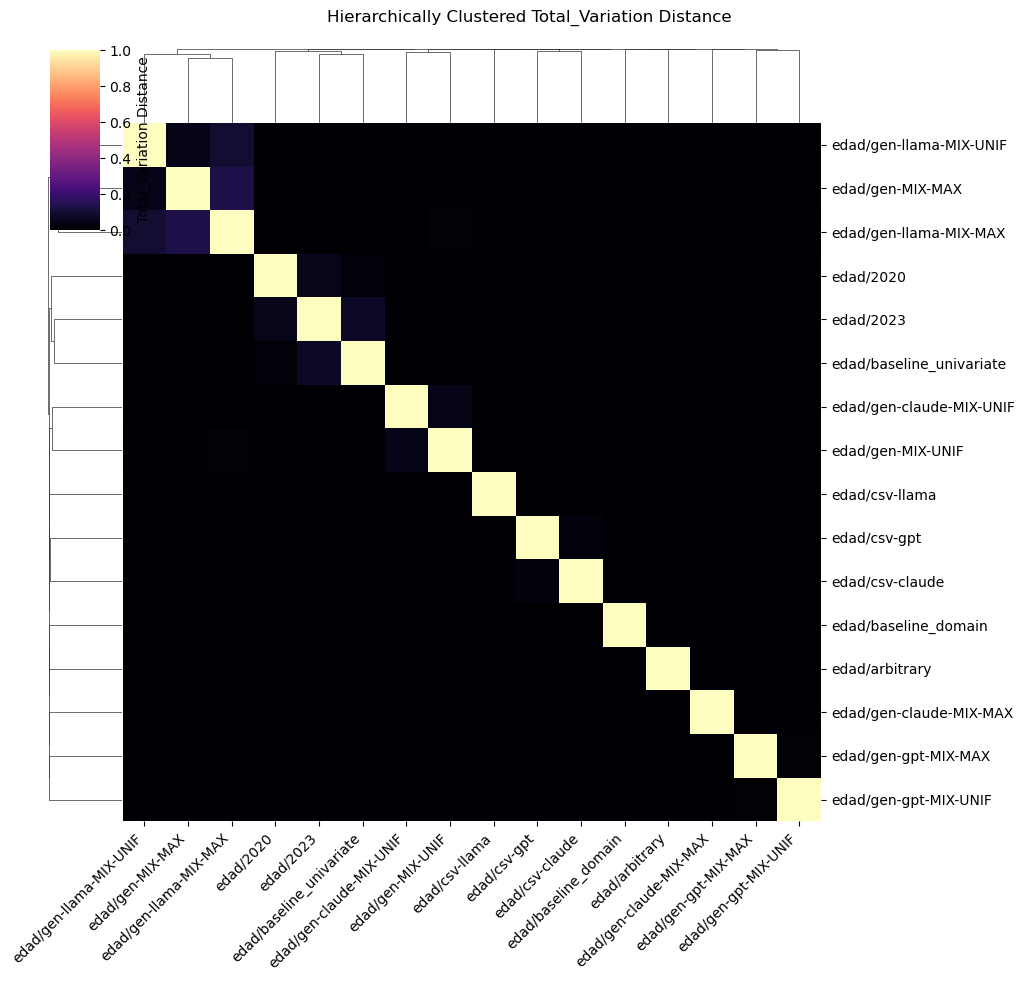

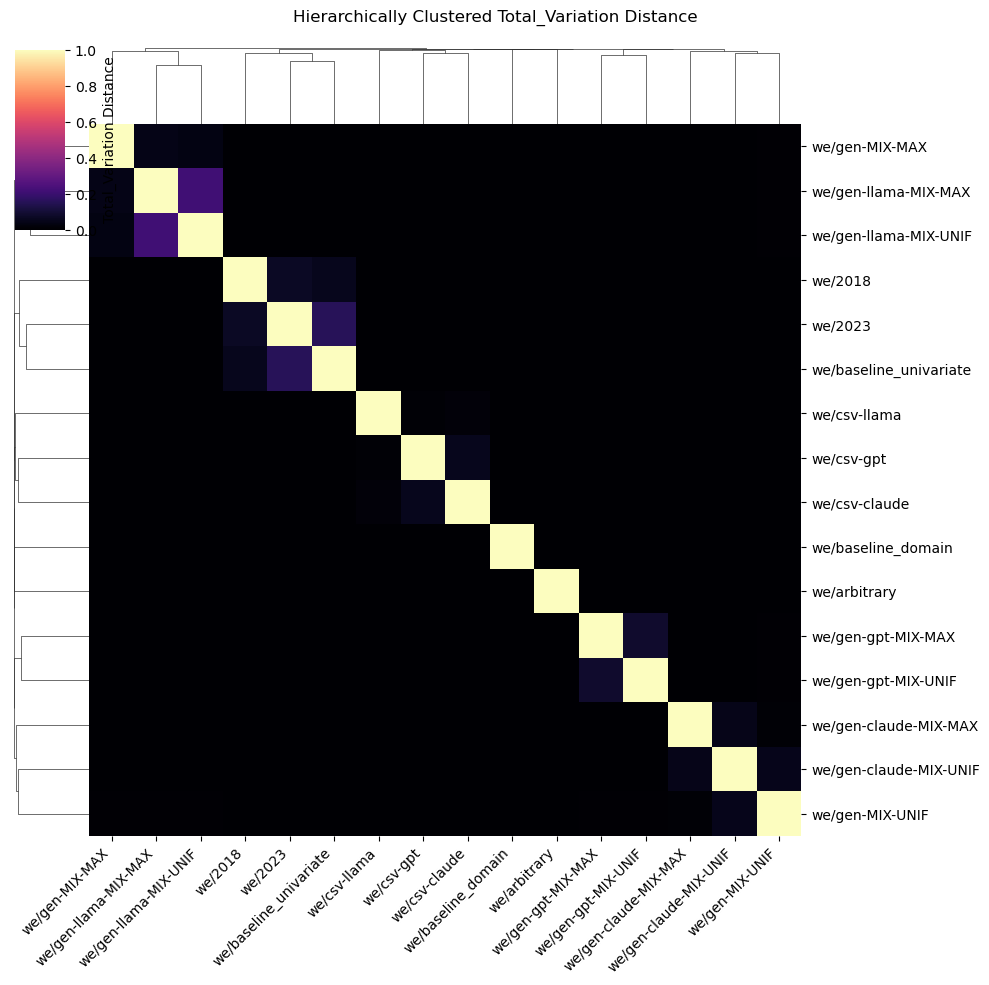

In [15]:
for DATASET_FAMILY in ["acs", "edad", "we"]:

    private_dataset_pointer = [(ALL_EXPERIMENTS[DATASET_FAMILY].test_name,)]

    core_public_dataaset_pointers = [(name,) for name in ALL_EXPERIMENTS[DATASET_FAMILY].dev_names
                                    if name != ALL_EXPERIMENTS[DATASET_FAMILY].test_name]

    additional_public_dataaset_pointers = ADDITIONAL_EXPERIMENTS[DATASET_FAMILY]

    _, schema, _ = load_dataset(ALL_EXPERIMENTS[DATASET_FAMILY].test_name)
    
    datasets = {pointer[0]: load_dataset(*pointer)[0]
    for pointer in private_dataset_pointer + core_public_dataaset_pointers + additional_public_dataaset_pointers}

    display(Markdown(f"## {DATASET_FAMILY}"))
    print(f"Dim = {len(schema)}")
    print(f"Total Dim = {np.prod([len(col_schema['values']) for col_schema in schema.values()])}")
    display(calc_dataset_similarity(datasets).multiply(100).round(1).loc[:,private_dataset_pointer[0][0]].sort_values(ascending=False))
    display(plot_distribution_distances(datasets))

In [ ]:
import numpy as np



1749600